In [122]:
from __future__ import print_function

In [123]:
import torch

In [124]:
torch.__version__

'1.0.1.post2'

### 1、初始化Tensor对象

In [125]:
# 构建 5 * 3 矩阵，只分配内存，未做初始化
torch.Tensor(5, 3)

tensor([[ 0.0000e+00, -4.6566e-10, -7.0642e+11],
        [ 1.0845e-19,  5.6052e-45,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-7.0668e+11,  3.6902e+19, -7.1032e+11]])

In [126]:
# 使用[0,1]均匀分布随机初始化二维数组
torch.rand(5, 3)

tensor([[0.7374, 0.0804, 0.8127],
        [0.1543, 0.6486, 0.6562],
        [0.2889, 0.2062, 0.8709],
        [0.7002, 0.7791, 0.2692],
        [0.1364, 0.3156, 0.9693]])

In [127]:
# 使用正态分布随机初始化二维数组
x = torch.randn(5, 3)
x

tensor([[ 0.9328, -0.3719, -2.3231],
        [-0.0982, -0.2596,  0.2082],
        [-0.9983, -0.3303,  0.4495],
        [ 0.4171,  1.0285,  0.3775],
        [-0.9685, -0.5384,  0.8275]])

### 2、查看Tensor的形状
> size()  
> shape

In [128]:
x.size()

torch.Size([5, 3])

In [129]:
x.shape

torch.Size([5, 3])

In [130]:
x.shape[0]

5

### 3、Tensor的基本运算
以 add 为例  
> x + y  
> torch.add(x, y)  
> x.add(x, y)  
> torch.add(x, y, out=result)  
> x.add_(y)

In [131]:
y = torch.rand(5, 3)
y

tensor([[0.3331, 0.2375, 0.6203],
        [0.8088, 0.7447, 0.9634],
        [0.3713, 0.7307, 0.0873],
        [0.3850, 0.1262, 0.5893],
        [0.7878, 0.3386, 0.3818]])

In [132]:
# 加法的第一种写法
x + y

tensor([[ 1.2659, -0.1343, -1.7029],
        [ 0.7106,  0.4851,  1.1716],
        [-0.6270,  0.4004,  0.5368],
        [ 0.8020,  1.1547,  0.9668],
        [-0.1807, -0.1999,  1.2093]])

In [133]:
# 加法的第二种写法
torch.add(x, y)

tensor([[ 1.2659, -0.1343, -1.7029],
        [ 0.7106,  0.4851,  1.1716],
        [-0.6270,  0.4004,  0.5368],
        [ 0.8020,  1.1547,  0.9668],
        [-0.1807, -0.1999,  1.2093]])

In [134]:
# 加法的第三种写法
x.add(y)

tensor([[ 1.2659, -0.1343, -1.7029],
        [ 0.7106,  0.4851,  1.1716],
        [-0.6270,  0.4004,  0.5368],
        [ 0.8020,  1.1547,  0.9668],
        [-0.1807, -0.1999,  1.2093]])

In [135]:
# 加法的第四种写法， 指定结果输出目标
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
result

tensor([[ 1.2659, -0.1343, -1.7029],
        [ 0.7106,  0.4851,  1.1716],
        [-0.6270,  0.4004,  0.5368],
        [ 0.8020,  1.1547,  0.9668],
        [-0.1807, -0.1999,  1.2093]])

In [136]:
# 加法的第五种写法，会修改Tensor本身, 无返回
y.add_(x)
y

tensor([[ 1.2659, -0.1343, -1.7029],
        [ 0.7106,  0.4851,  1.1716],
        [-0.6270,  0.4004,  0.5368],
        [ 0.8020,  1.1547,  0.9668],
        [-0.1807, -0.1999,  1.2093]])

### 4、与Numpy互相转换

In [137]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [138]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [139]:
import numpy as np

In [140]:
a = np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [141]:
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

### 5、数据拷贝--不共享内存

In [142]:
tensor = torch.tensor([3, 4])
tensor

tensor([3, 4])

In [143]:
scale = torch.tensor(3)
scale

tensor(3)

In [144]:
old_tensor = tensor
new_tensor = torch.tensor(old_tensor)
new_tensor[0] = 111
old_tensor, new_tensor

/Users/duwei/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(tensor([3, 4]), tensor([111,   4]))

In [145]:
# 使用clone创建独立的tensor
new_tensor = old_tensor.clone()
new_tensor[0] = 222
old_tensor, new_tensor

(tensor([3, 4]), tensor([222,   4]))

In [146]:
# 如果想要共享内存使用 from_numpy 或 detach
new_tensor = old_tensor.detach()
new_tensor[0] = 111
old_tensor, new_tensor

(tensor([111,   4]), tensor([111,   4]))

### 将Tensor转为GPU的Tensor

In [147]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [148]:
x = x.to(device)
y = x.to(device)
z = x + y
z

tensor([[ 1.8656, -0.7437, -4.6463],
        [-0.1964, -0.5192,  0.4164],
        [-1.9967, -0.6607,  0.8989],
        [ 0.8342,  2.0570,  0.7550],
        [-1.9371, -1.0769,  1.6549]])

### autograd：自动微分
反向传播求导数

In [149]:
# 为tensor设置 requires_grad , 代表着需要自动求导数
# Pytorch会自动调用 autograd 记录操作
x = torch.ones(2, 2, requires_grad=True)

# 上一步等价于
x = torch.ones(2, 2)
x.requires_grad = True

x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [150]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [151]:
y.backward()  # 反向传播，计算梯度

In [152]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为1
x.grad

tensor([[1., 1.],
        [1., 1.]])

### grad 注意事项
*grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需要把梯度清零*

In [153]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [154]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [155]:
x.sum?

Docstring:
sum(dim=None, keepdim=False, dtype=None) -> Tensor

See :func:`torch.sum`
Type:      builtin_function_or_method


In [156]:
x = torch.tensor?

Docstring:
tensor(data, dtype=None, device=None, requires_grad=False) -> Tensor

Constructs a tensor with :attr:`data`.

.. warning::

    :func:`torch.tensor` always copies :attr:`data`. If you have a Tensor
    ``data`` and want to avoid a copy, use :func:`torch.Tensor.requires_grad_`
    or :func:`torch.Tensor.detach`.
    If you have a NumPy ``ndarray`` and want to avoid a copy, use
    :func:`torch.from_numpy`.

.. warning::

    When data is a tensor `x`, :func:`torch.tensor` reads out 'the data' from whatever it is passed,
    and constructs a leaf variable. Therefore ``torch.tensor(x)`` is equivalent to ``x.clone().detach()``
    and ``torch.tensor(x, requires_grad=True)`` is equivalent to ``x.clone().detach().requires_grad_(True)``.
    The equivalents using ``clone()`` and ``detach()`` are recommended.

Args:
    data (array_like): Initial data for the tensor. Can be a list, tuple,
        NumPy ``ndarray``, scalar, and other types.
    dtype (:class:`torch.dtype`, optional):

In [ ]:
x = torch.tensor

In [157]:
x = torch.tensor([[2, 2],[2, 2]], dtype=torch.float, requires_grad=True)
x

tensor([[2., 2.],
        [2., 2.]], requires_grad=True)

In [158]:
y =x.sum()
y

tensor(8., grad_fn=<SumBackward0>)

In [159]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

In [160]:
y

tensor(8., grad_fn=<SumBackward0>)

In [161]:
x = torch.tensor([[0.1, 0.2], [0.3, 0.4]], requires_grad=True)
x

tensor([[0.1000, 0.2000],
        [0.3000, 0.4000]], requires_grad=True)

In [162]:
y = x.sum()
y

tensor(1., grad_fn=<SumBackward0>)

In [163]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

### 神经网络
使用 LeNet

#### 定义网络
把网络中具有可学习参数的层放在构造函数 __init__ 中

In [164]:
import torch.nn as nn
import torch.nn.functional as F

In [165]:
class Net(nn.Module):
    def __init__(self):
        # nn.Module的子类的函数必须在构造函数中执行父类的构造函数
        super(Net, self).__init__()
        
        # 卷积层 1 表示输入为单通道， 6 表示输出通道，5 表示卷积核为 5 * 5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # 全连接层 y = wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 卷积 -> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        print(x.size())
        # reshape -1 表示自适应， 返回一个新的 tensor
        x = x.view(x.size()[0], -1)
        print(x.size())
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [166]:
net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

网络的可学习参数通过 net.parameters()返回，net.named_parameters() 可同时返回可学习的参数与名称

In [167]:
params = list(net.parameters())
print(len(params))

10


In [168]:
for name, parameter in net.named_parameters():
    print(name, ':', parameter.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward 的输入和输出都是 Tensor

In [169]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
out.size()

torch.Size([1, 16, 5, 5])
torch.Size([1, 400])


torch.Size([1, 10])

In [170]:
out

tensor([[-0.1006, -0.0819, -0.1207,  0.0465,  0.0390, -0.1039,  0.0244,  0.0041,
          0.0542,  0.0965]], grad_fn=<AddmmBackward>)

In [171]:
net.zero_grad()  # 所有参数的梯度清零
out.backward(torch.ones(1, 10))  # 反向传播

torch.nn 只支持mini-batch， 不支持一次只输入一个样本，即一次必须是一个batch。但如果输入只想输入一个样本，则用 input.unsqueeze(0) 将batch_size 设为 1。例如 nn.Conv2d 的输入必须是4维的，形如： nSamples * nChannels * Height * Width

#### 损失函数
nn 实现了神经网络中的大多数的损失函数。例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失

In [172]:
output = net(input)
target = torch.arange(0,10, dtype=torch.float).view(1,10) 
target

torch.Size([1, 16, 5, 5])
torch.Size([1, 400])


tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [173]:
output

tensor([[-0.1006, -0.0819, -0.1207,  0.0465,  0.0390, -0.1039,  0.0244,  0.0041,
          0.0542,  0.0965]], grad_fn=<AddmmBackward>)

In [174]:
criterion = nn.MSELoss()
loss = criterion(output, target)
loss # loss是个scalar

tensor(28.3199, grad_fn=<MseLossBackward>)


如果对loss进行反向传播溯源(使用gradfn属性)，可看到它的计算图如下：

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss  
当调用loss.backward()时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [175]:
# 运行 backward，观察调用前后的 grad
net.zero_grad()  # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([-0.0423,  0.0219, -0.0079,  0.0279,  0.0211, -0.0547])


#### 优化器
在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和偏置，例如随机梯度下降(SGD)的更新策略如下：  
$$weight = weight - learning_rate * gradient$$
手动实现如下：  
> learning_rate = 0.01  
> for f in net.parameters():  
>     f.data.sub_(f.grad.data * learning_rate)  # inplace 减法

In [176]:
import torch.optim as optim

In [177]:
# 新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中，先将梯度清零(与 net.zero_grad()效果一样)
optimizer.zero_grad()

# 计算损失
output = net(input)
loss = criterion(output, target)

# 反向传播
loss.backward()

# 更新参数
optimizer.step()

torch.Size([1, 16, 5, 5])
torch.Size([1, 400])


#### 数据加载与预处理
torchvision

### CIFAR-10分类
1、使用torchvision加载并预处理CIFRA-10数据集  
2、定义网络  
3、定义损失函数和优化器  
4、训练网络并更新网络参数  
5、测试网络  
包含10个类别，airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。



In [178]:
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()  # 可以把Tensor转为Image， 方便可视化

In [179]:
# 定义对数据集的预处理
transform = transforms.Compose([
    transforms.ToTensor(), # 转为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 归一化  mean, std 3通道需要定义3个
])

In [187]:
# 训练集
trainset = torchvision.datasets.CIFAR10(root='/Users/duwei/Workspace/machine_learning/pytorch-book-learning/data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [188]:
# 测试集
testset = torchvision.datasets.CIFAR10(root='/Users/duwei/Workspace/machine_learning/pytorch-book-learning/data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [189]:
# CIFRA-10 类别
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Dataset 是一个数据集，可以按下标访问，返回形如(data, label)的数据

ship


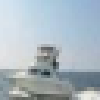

In [190]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据，均值归一化， a - mean / std = b
show((data + 1) / 2).resize((100, 100))

DataLoader 是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程优化和数据打乱等操作。  
当程序对dataset的所有数据遍历完一遍后，相应的对DataLoader也完成了一次迭代

        car       truck        deer        ship


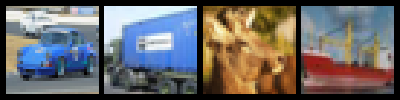

In [192]:
dataiter = iter(trainloader)
images, labels = dataiter.next()  # 返回4张图片以及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(torchvision.utils.make_grid((images + 1) / 2)).resize((400, 100))

#### 定义网络
拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [193]:
import torch.nn as nn
import torch.nn.functional as F

In [194]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 卷积 -> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # 拍平--全连接层
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [195]:
net2 = Net2()
net2

Net2(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

#### 定义损失函数和优化器

In [196]:
from torch import optim

In [197]:
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = optim.SGD(net2.parameters(), lr=0.01, momentum=0.9)

#### 训练网络
* 输入数据  
* 前向传播 + 反向传播  
* 更新参数

In [198]:
torch.set_num_threads(6)

In [199]:
epoches = 2

In [200]:
for epoch in range(epoches):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 输入数据
        inputs, labels = data
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        # 更新参数
        optimizer.step()
        
        # 打印log
        # loss 是一个 scalar，需要使用 loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 2.129
[1,  4000] loss: 1.979
[1,  6000] loss: 1.975
[1,  8000] loss: 1.989
[1, 10000] loss: 1.973
[1, 12000] loss: 1.953
[2,  2000] loss: 2.002
[2,  4000] loss: 2.010
[2,  6000] loss: 2.046
[2,  8000] loss: 2.106
[2, 10000] loss: 2.059
[2, 12000] loss: 2.052
Finished Training


此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch）

实际的label:     horse      cat      cat      dog


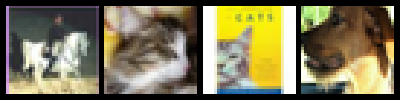

In [201]:
dataiter = iter(testloader)
images, labels = dataiter.next()  # 一个batch返回4张图片
print('实际的label: ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(torchvision.utils.make_grid((images + 1)/2)).resize((400, 100))

接着计算网络预测的label：

In [205]:
# 计算图片在每个类别上的分数
outputs = net2(images)

# 得分最高的那个类
_, predicted = torch.max(outputs.data, 1)
print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果:  plane   dog  bird  deer


In [210]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 23 %


#### 在GPU训练

In [211]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net2.to(device)
images = images.to(device)
labels = labels.to(device)
output = net2(images)
loss = criterion(output, labels)

loss

tensor(2.0289, grad_fn=<NllLossBackward>)